# Contents

- Colab
    - GPU 활용하기 (Oral)
    - Hotkeys
    - 터미널 명령
    - 파일 입출력
- Numpy
    - 벡터 & 행렬
        - 개체 생성
        - 인덱싱 & 요소 할당
        - 행렬 연산
        - Reshaping
    - Python list와의 비교
- Exercise1
- PyTorch
    - Tensors
        - 개체 생성
        - Tensor 연산
        - Reshaping
- Exercise2


# How to use Colab?


Colab은 별도의 세팅 필요없이 전적으로 클라우드에서 실행되는 무료 Jupyter notebook 환경입니다.

Colab을 활용하면 브라우저에서 바로 코드를 작성 및 실행하고, 분석 결과를 저장 및 공유하고, 강력한 컴퓨팅 리소스를 사용할 수 있습니다.

- 현재 무료 Colab 버전에서는 Tesla T4 GPU를 무료 제공합니다.

Advantages

- The best thing is that it is free!
- It gives you costly GPUs and working envriornment, independent of what personal machine you are using.
- It also runs on Google servers using virtual machines and you don’t need to install any packages, which sometimes create difficulty you are using different operating systems such as MAC, Windows, and Linux.

### Hotkeys (change as you want)

| hotkey | action |
| --- | --- |
| ctrl + M H | Open hotkey configuration |
| ctrl + O | Open note |
| ctrl + S | Save note |
| ctrl + F9 | Run all cells |
| ctrl + shift + enter | Run cell |
| shift + enter | Run cell and move on to the next |
| alt + enter | Run cell and add a new one below |
| ctrl + M I | Stop running execution |
| ctrl + M A | Add new code cell above |
| ctrl + M B | Add new code cell below |
| ctrl + M D | Delete cell |
| ctrl + M K | Move cell up |
| ctrl + M J | Move cell down |
| ctrl + M Y | Change to code cell |
| ctrl + M M | Change to markdown cell |
| ctrl + M Z | Undo last cell execution |
| ctrl + H | Search |
| ctrl + / | Comment out or undo |

### 터미널 명령

In [1]:
# OS 버전 확인
# Colab에서 Linux 명령을 사용하기 위해서는 !를 앞에 붙여주면 됩니다.
!cat /etc/issue.net

Ubuntu 18.04.6 LTS


In [2]:
# CPU 정보 확인
!cat /proc/cpuinfo | grep 'processor\|model name\|cpu cores'
# 메모리(RAM) 정보 확인
!free -h
# 디스크 정보 확인
!df -h

processor	: 0
model name	: AMD EPYC 7B12
cpu cores	: 1
processor	: 1
model name	: AMD EPYC 7B12
cpu cores	: 1
              total        used        free      shared  buff/cache   available
Mem:            12G        507M        9.6G        1.2M        2.6G         11G
Swap:            0B          0B          0B
Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   24G   85G  22% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.1G  841M  58% /sbin/docker-init
tmpfs           6.4G   32K  6.4G   1% /var/colab
/dev/sda1        41G   25G   16G  61% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [3]:
# GPU 정보 확인
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [4]:
# Python 버전 확인
!python --version

Python 3.8.16


In [5]:
# 현재 작업 경로(Current Working Directory)
!pwd

/content


In [6]:
# 현재 작업 경로의 파일/폴더 리스트 확인
# ls -[옵션]
!ls -lah

total 16K
drwxr-xr-x 1 root root 4.0K Jan  5 14:34 .
drwxr-xr-x 1 root root 4.0K Jan  9 06:14 ..
drwxr-xr-x 4 root root 4.0K Jan  5 14:33 .config
drwxr-xr-x 1 root root 4.0K Jan  5 14:34 sample_data


In [7]:
!mv # mv [옵션] [원본 경로] [옮길 경로]
!cp # cp [옵션] [원본 경로] [옮길 경로]

mv: missing file operand
Try 'mv --help' for more information.
cp: missing file operand
Try 'cp --help' for more information.


In [8]:
!pip show torch

Name: torch
Version: 1.13.0+cu116
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.8/dist-packages
Requires: typing-extensions
Required-by: fastai, torchaudio, torchtext, torchvision


### 파일 입출력

In [ ]:
# Colab 작업경로에 파일 업로드
# [NOTE] 업로드된 파일은 런타임이 초기화될 경우 사라집니다.
import os
from google.colab import files

uploaded = files.upload()

for f in uploaded.keys():
    print('User uploaded file "{}" at "{}"'.format(f, os.getcwd()))

# Or simply open file tab then drag-and-drop

In [ ]:
# Download file from Colab workspace
# [NOTE] Chrome 브라우저 사용 및 써드파티 쿠키를 허용해야 합니다.
files.download('/content/sample_data/mnist_train_small.csv')

# 또는 간단히 '파일' 탭에서 마우스 우 클릭하여 다운로드 하는 것을 추천합니다.

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive

drive.mount('/content/gdrive')

# Numpy Tutorial

Refers heavily on 
https://nbviewer.jupyter.org/github/cgpotts/cs224u/blob/2019-spring/numpy_tutorial.ipynb


In [ ]:
import numpy as np

## Vectors & Matrices

### Initialization

In [ ]:
# 괄호 안의 차원으로 영행렬 생성
np.zeros(5)

In [ ]:
# np.zeros(shape=(3, 5)) 와 동일
np.zeros((3, 5))

In [ ]:
np.ones((3, 5))

In [ ]:
# 파이썬 list를 numpy array로 변환
np.array([1, 2, 3, 4, 5])

In [ ]:
np.ones(5)

In [ ]:
# numpy array를 파이썬 list로 변환
np.ones(5).tolist()

In [ ]:
# 자료형을 특정해줄 수 있습니다.
np.array([[1,2,3], [4,5,6]], dtype='int')

In [ ]:
# 간격만큼 띄워진 수열 생성
# np.arange(start, end, interval)
np.arange(0, 20, 2)

In [ ]:
# random floats in [0, 1) --> uniform distribution
# 0 이상 1 미만의 Uniform distribution에서 난수 추출

np.random.random(10)

In [ ]:
# identity matrix
np.identity(3)

### Indexing

In [ ]:
import numpy as np
x = np.array([10, 20, 30, 40, 50])

In [ ]:
x[0]

In [ ]:
x[-1]

In [ ]:
# slicing:
# 3번째 원소는 포함하지 않음
x[0:2]

In [ ]:
X = np.array([[1,2,3], [4,5,6]])
X

In [ ]:
X[0]

In [ ]:
X[:, 0]

In [ ]:
X[0, 0]

In [ ]:
# Matrix 
# [Row, Column]
# 행 추출
X[0, :]

In [ ]:
# 열 추출
X[:, 0]

In [ ]:
# 여러 열 추출
X[:, [0, 2]]

### 요소 할당

In [ ]:
# Numpy array: Mutable

a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a[0, 1])
b = a[:2, 1:3]

b_ = a
print('b: ', b)
print(f'id of a: {id(a)}')
print(f'id of b_: {id(b_)}')

assert id(a) == id(b_)

print(f'id of b: {id(b)}')

print('a[0, 0]: ', a[0, 0])

b_[0, 0] = 77 
print("after changes")
print('a[0, 0]:', a[0, 0])  

In [ ]:
a = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
c = a.copy()
assert id(a) != id(c), 'Functional methods create a new copy of the array'

c = c[:2, 1:3]
print(a[0, 1])   
c[0, 0] = 77
print(a[0, 1])  

### Operations (functions)

In [ ]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
a

In [ ]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
#  Built-in 메서드
print(a.sum())   
print(a.mean()) 
print(a.max())
   
print(a.argmax()) # 가장 큰 숫자의 인덱스, 위치를 알려줌

In [ ]:
print(a.max(axis=0))

In [ ]:
# others
print(np.log(a)) 
print(np.exp(a)) 

In [ ]:
a

In [ ]:
""" Broadcasting """
# Vector + scalar
print(a + 1) 

m1 = np.array([[1, 2]])
m2 = np.array([[3], 
               [4]])
m3 = np.array([[1,2],[3,4]])
# 2 x 1 Vector + 1 x 2 Vector
print(m1)
print(m2)
print(m1 + m2)
# 2x2 행렬

# 2 x 1 Vector + 2 x 2 Vector
print(m1 + m3)  # 2x2 행렬


# 1 x 2 Vector + 2 x 2 Vector
print(m2 + m3)

### Reshaping

In [ ]:
z = np.arange(1, 7)
z

In [ ]:
z.shape

In [ ]:
# .reshape(원하는 크기)

Z = z.reshape(2, 3)
Z

In [ ]:
Z.shape

In [ ]:
Z.reshape(6)

In [ ]:
# same as above
Z.flatten()

In [ ]:
# transpose the matrix
Z.T

## Comparison with python lists

Why do we use array? 



In [ ]:
# log every value as list, one by one
def listlog(vals):
    return [np.log(y) for y in vals]

In [ ]:
# get random vector
samp = np.random.random_sample(int(1e7))+1
samp

In [ ]:
%time _ = listlog(samp)

In [ ]:
%time _ = np.log(samp)

## Exercise1

Q1. Create a vector with values ranging from 10 to 49 (ex. 10, 11, ... 49) \


In [ ]:
# write your code
np.arange(10, 50)

Q2. Create a vector with values ranging from 49 to 10 (ex. 49, 48, ... 10)\


In [ ]:
# write your code
print(np.arange(49, 9, -1))

Q3. Get the positions where elements of 'a' and 'b' match? (Hint: np.where)\
Input)\
a = np.array([1,2,3,2,3,4,3,4,5,6])\
b = np.array([7,2,10,2,7,4,9,4,9,8])\
Output\
=> array([1, 3, 5, 7])


In [ ]:
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])
# write your code

idx = np.where(a==b)
np.arange(10)[idx]

Q4. Remove Negative values in the array ‘b’ (HARD, Hint: np.where)\
Input: a = np.array((3, -2, 2, -1, 3))\
Output:\
=> [3, 2, 3]

In [52]:
a = np.array((3, -2, 2, -1, 3))
# write your code



# Pytorch Tutorial

Refers heavily on 
https://github.com/cgpotts/cs224u/blob/master/tutorial_pytorch.ipynb

In [77]:
import torch

## Tensors

### Tensor creation

#### Calling the constructor

In [78]:
t = torch.FloatTensor(2, 3)
print(t)
print(t.size())

tensor([[1.3258e-28, 0.0000e+00, 3.7835e-44],
        [0.0000e+00,        nan, 4.5905e-41]])
torch.Size([2, 3])


In [79]:
# tensor를 0으로 초기화
t.zero_()

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [80]:
torch.FloatTensor([[1, 2, 3], [4, 5, 6]])

tensor([[1., 2., 3.],
        [4., 5., 6.]])

#### Calling a method in the torch module

In [81]:
tl = torch.tensor([1, 2, 3])
t = torch.tensor([1., 2., 3.])
print(tl, tl.type()) # A 64-bit integer tensor:
print(t, t.type()) # A 32-bit float tensor:

tensor([1, 2, 3]) torch.LongTensor
tensor([1., 2., 3.]) torch.FloatTensor


In [82]:
t = torch.zeros(2, 3)
print(t)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [83]:
torch.empty(2, 3)

tensor([[1.3259e-28, 0.0000e+00, 3.5032e-44],
        [0.0000e+00,        nan, 6.4460e-44]])

In [84]:
t_zeros = torch.zeros_like(t)        # zeros_like returns a new tensor, t와 동일한 차원의 영행렬
t_ones = torch.ones(2, 3)            # creates a tensor with 1s
t_fives = torch.empty(2, 3).fill_(5) # creates a non-initialized tensor and fills it with 5
t_random = torch.rand(2, 3)          # creates a uniform random tensor
t_normal = torch.randn(2, 3)         # creates a normal random tensor

print(t_zeros)
print(t_ones)
print(t_fives)
print(t_random)
print(t_normal)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([[0.1817, 0.4060, 0.0842],
        [0.9779, 0.0635, 0.9386]])
tensor([[ 0.8713,  0.6557,  0.6841],
        [ 1.1315, -1.6644,  0.9453]])


In [86]:
# Tensor의 계산 그래프를 유지하는 복사본을 생성하기
# mutable

t1 = torch.clone(t)
assert id(t) != id(t1), 'Functional methods create a new copy of the tensor'

# To create a new _independent_ copy, we do need to detach 
# from the graph
t1 = torch.clone(t).detach()

#### Using the PyTorch–NumPy bridge

In [87]:
# Create a new multi-dimensional array in NumPy with the np datatype (np.float32)
a = np.array([1., 2., 3.])

# Convert the array to a torch tensor
t = torch.tensor(a)

# Convert torch tensor to array
ta = t.numpy()

print("NumPy array: {}, type: {}".format(a, a.dtype))
print("Torch tensor: {}, type: {}".format(t, t.dtype))

NumPy array: [1. 2. 3.], type: float64
Torch tensor: tensor([1., 2., 3.], dtype=torch.float64), type: torch.float64


In [88]:
ta

array([1., 2., 3.])

#### Indexing

In [89]:
t = torch.randn(2, 3)
print(t)
print(t[:, 0])

tensor([[ 0.7555, -1.3653, -1.0135],
        [-0.9544,  0.1780, -0.4520]])
tensor([ 0.7555, -0.9544])


In [90]:
t = torch.randn(5, 6)
print(t)
i = torch.tensor([1, 3])
j = torch.tensor([4, 5])
print(t[i])                          # selects rows 1 and 3
print(t[i, j])                       # selects (1, 4) and (3, 5)

tensor([[ 0.4348, -1.9469,  0.3598,  1.0891, -0.2615, -0.2793],
        [ 0.1742, -0.0530, -0.7479, -1.4754, -0.9705, -1.5131],
        [-0.3518,  0.0039,  0.1184,  1.2352,  1.3144, -1.4747],
        [ 0.3687,  0.8528, -0.3671,  0.3892, -0.9011,  0.3959],
        [ 1.0098, -1.5924, -0.3345,  0.3237,  1.4973,  1.1317]])
tensor([[ 0.1742, -0.0530, -0.7479, -1.4754, -0.9705, -1.5131],
        [ 0.3687,  0.8528, -0.3671,  0.3892, -0.9011,  0.3959]])
tensor([-0.9705,  0.3959])


### Operations on tensors

In [91]:
# Scalars =: creates a tensor with a scalar 
# (0차원 tensor)
s = torch.tensor(42)
print(s)

tensor(42)


In [92]:
# 0차원 tensor에만 적용 가능
# 텐서 안의 값 반환
s.item()

42

#### Matrix operation

In [93]:
# Row vector
x = torch.randn(1,3)
print("Row vector\n{}\nwith size {}".format(x, x.size()))

# Column vector
v = torch.randn(3,1)
print("Column vector\n{}\nwith size {}".format(v, v.size()))

# Matrix
A = torch.randn(3, 3)
print("Matrix\n{}\nwith size {}".format(A, A.size()))

Row vector
tensor([[-0.9174,  0.0742,  0.4507]])
with size torch.Size([1, 3])
Column vector
tensor([[ 0.4501],
        [-0.7718],
        [-0.0247]])
with size torch.Size([3, 1])
Matrix
tensor([[ 0.1363, -0.5830, -1.4360],
        [ 1.4938,  0.9626, -0.1226],
        [ 0.3239,  0.7964, -0.7557]])
with size torch.Size([3, 3])


In [94]:
#@title
u = torch.matmul(A, v)
print(u, u.shape) # [3, 1]
b = torch.randn(3, 1)
y = u + b
print(y)

# or you can use torch.add()
print(torch.add(u, b))

tensor([[ 0.5467],
        [-0.0675],
        [-0.4502]]) torch.Size([3, 1])
tensor([[ 1.1578],
        [-0.3091],
        [-0.4294]])
tensor([[ 1.1578],
        [-0.3091],
        [-0.4294]])


In [69]:
# x.shape = (1, 3)
# torch.matmul(A, v).shape = (3, 1)
s = torch.matmul(x, torch.matmul(A, v))
print(s.item()) 

0.9231406450271606


#### Matmul vs. Mul

In [70]:
# Mul: 행렬곱 (matrix multiplication)
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1.matmul(m2)) # 2 x 1

# Mul: 요소곱 (element-wise multiplication)
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1 * m2) # 2 x 2
print(m1.mul(m2))

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])
Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


#### others

In [95]:
# common tensor methods (they also have the counterpart in 
# the torch package, e.g. as torch.sum(t))
t = torch.randn(2,3)
print(t)
print(t.sum(dim=0))            # sum
print(t.t())                   # transpose(전치)
print(t.numel())               # number of elements in tensor
print(t.nonzero())             # indices of non-zero elements

# operations in the package
torch.arange(0, 10)     # tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
torch.eye(3, 3)         # creates a 3x3 matrix with 1s in the diagonal (identity in this case)
t = torch.arange(0, 3)

tensor([[ 0.1650,  0.2527,  0.5094],
        [ 0.4383,  0.2907, -0.7091]])
tensor([ 0.6033,  0.5434, -0.1998])
tensor([[ 0.1650,  0.4383],
        [ 0.2527,  0.2907],
        [ 0.5094, -0.7091]])
6
tensor([[0, 0],
        [0, 1],
        [0, 2],
        [1, 0],
        [1, 1],
        [1, 2]])


In [96]:
torch.eye(3, 3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

### Reshaping (view)

In [97]:
t = np.arange(12)

In [98]:
t

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [99]:
import torch
import numpy as np
# -1을 사용하면 해당 dimension을 모양에 맞게 채워줍니다.

t = np.arange(12).reshape(-1, 2, 3)
# 2 = 12/(2*3)

t.shape

(2, 2, 3)

In [100]:
#@title
floatt = torch.FloatTensor(t)
floatt.shape

torch.Size([2, 2, 3])

In [101]:
#@title
# 4 = 12/3
floatt.view([-1, 3]).shape

torch.Size([4, 3])

more techniques

In [102]:
#@title
# .flatten(): tensor를 1차원으로 평면화
flattened = floatt.flatten()
print(flattened)
print(flattened.shape)

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])
torch.Size([12])


In [103]:
t = torch.randn(2,3)
t.flatten()

tensor([-0.8144, -0.0528, -1.7157,  0.1714, -0.5160,  1.5454])

In [104]:
#@title
t = torch.tensor(np.arange(6))

In [105]:
t = torch.randn(2,3)
print(t)
print(t.shape)
print(t.unsqueeze(1)) 
print(t.unsqueeze(1).shape) 

tensor([[ 0.7318, -1.9232, -0.4213],
        [-0.7159,  0.4026,  0.7540]])
torch.Size([2, 3])
tensor([[[ 0.7318, -1.9232, -0.4213]],

        [[-0.7159,  0.4026,  0.7540]]])
torch.Size([2, 1, 3])


In [108]:
#@title
print(t)
print(t.view(-1, 2))            # 텐서를 선택한 차원으로 재배열

# unsqueeze
print(t.unsqueeze(1))           # 선택한 위치에 차원 추가
print(t.unsqueeze(1).squeeze()) # size 1인 차원을 모두 제거

print(torch.cat((t, t)).shape)      # tensor([0, 1, 2, 0, 1, 2])
print(torch.stack((t, t)).shape)      # tensor([[0, 1, 2], [0, 1, 2]])

tensor([[ 0.7318, -1.9232, -0.4213],
        [-0.7159,  0.4026,  0.7540]])
tensor([[ 0.7318, -1.9232],
        [-0.4213, -0.7159],
        [ 0.4026,  0.7540]])
tensor([[[ 0.7318, -1.9232, -0.4213]],

        [[-0.7159,  0.4026,  0.7540]]])
tensor([[ 0.7318, -1.9232, -0.4213],
        [-0.7159,  0.4026,  0.7540]])
torch.Size([4, 3])
torch.Size([2, 2, 3])


## Exercise2

**Restriction**
- Pytorch Tensor로 먼저 변환하십시오. 
- Numpy가 아닌 Pytorch tensor 메소드만 사용하십시오.


Q1. Using reshaping and indexing, print out as follows:

Goal : \
`torch.Size([2, 2, 6]) \
tensor([18., 19., 20., 21.])`





In [80]:
t = np.arange(24)
### write your code (Hint : keep printing the shape and result so that you can see!)




Q2. Add 1 to tensor A (Hint: Broadcast)\
Input: a = np.arange(9).reshape(3, 3)\
Output: \


```
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
```





In [81]:
a = np.arange(9).reshape(3, 3)
# write your code





Q3. Swap rows 1 and 2 in the array 'a’ at Q2(HARD)

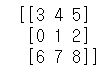


In [82]:
a = np.arange(9).reshape(3, 3)
# write your code


